#1 Create a histogram of the flipper_length_mm column using Seaborn and describe the distribution.

#2 Create a box plot to compare the body_mass_g distribution across different species.

#3 Calculate the mean, median, and standard deviation of the body_mass_g column.

#4 Filter the dataset to include only Adelie species and calculate the mean body_mass_g for this species.

#5 Group the dataset by species and calculate the mean flipper_length_mm for each species.

#6 Calculate the summary statistics (mean, median, standard deviation, Q1, Q3, IQR) for the bill_length_mm column. 
  Identify any potential outliers using these statistics.
  
#7 Create a box plot for the bill_length_mm column and visually identify any outliers. Compare these with the outliers  
  identified using the IQR method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('penguins')

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


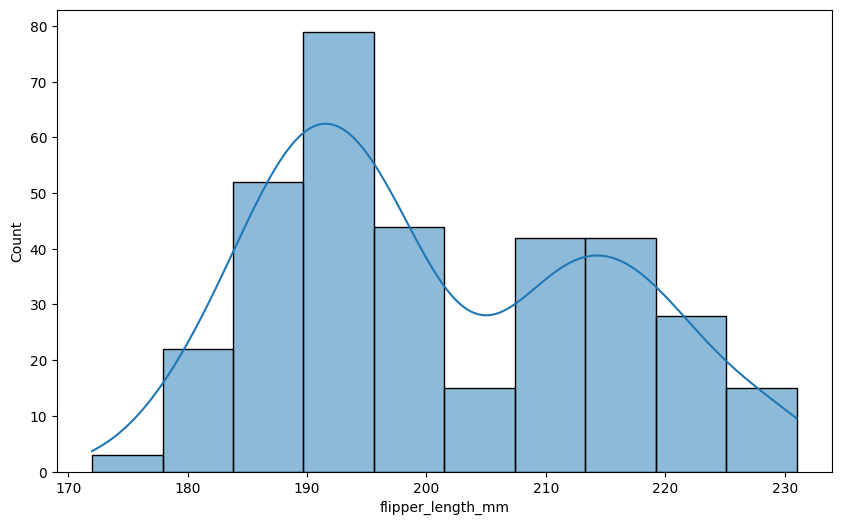

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df["flipper_length_mm"], kde=True)
plt.xlabel=("flipper length")
plt.ylabel=('frequency')
plt.show()

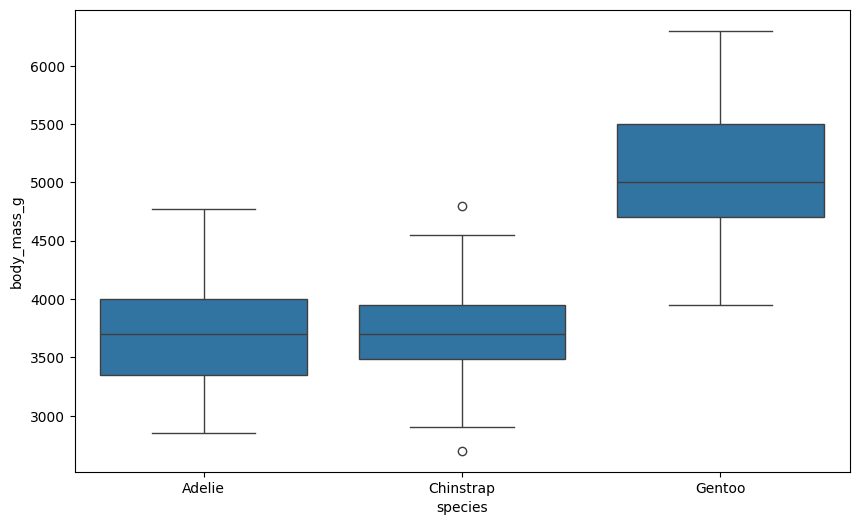

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x="species",y="body_mass_g", data=df)
plt.xlabel=("species")
plt.ylabel=('body_mass_g')
plt.show()

In [7]:
mean_bm=df["body_mass_g"].mean()
median_bm=df["body_mass_g"].median()
std_bm=df["body_mass_g"].std()
mean_bm, median_bm, std_bm

(np.float64(4201.754385964912),
 np.float64(4050.0),
 np.float64(801.9545356980956))

In [11]:
df_filter=df[df['species']=="Chinstrap"]
df_filter

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


In [13]:
df_filter["body_mass_g"].median()

np.float64(3700.0)

In [16]:
df.groupby("species")['flipper_length_mm'].mean()

species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64

In [17]:
mean_bl=df["bill_length_mm"].mean()
median_bl=df["bill_length_mm"].median()
std_bl=df["bill_length_mm"].std()
Q1_bl=df["bill_length_mm"].quantile(0.25)
Q3_bl=df["bill_length_mm"].quantile(0.75)
IQR_bl=Q3_bl-Q1_bl
lower_bl=Q1_bl-1.5*IQR_bl
upper_bl=Q3_bl+1.5*IQR_bl

mean_bl, median_bl, std_bl, Q1_bl, Q3_bl, IQR_bl, lower_bl, upper_bl 

(np.float64(43.9219298245614),
 np.float64(44.45),
 np.float64(5.4595837139265315),
 np.float64(39.225),
 np.float64(48.5),
 np.float64(9.274999999999999),
 np.float64(25.312500000000004),
 np.float64(62.412499999999994))

In [18]:
outliers_bl=df[(df['bill_length_mm']<Q1_bl) | (df['bill_length_mm']>Q3_bl)]
outliers_bl

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


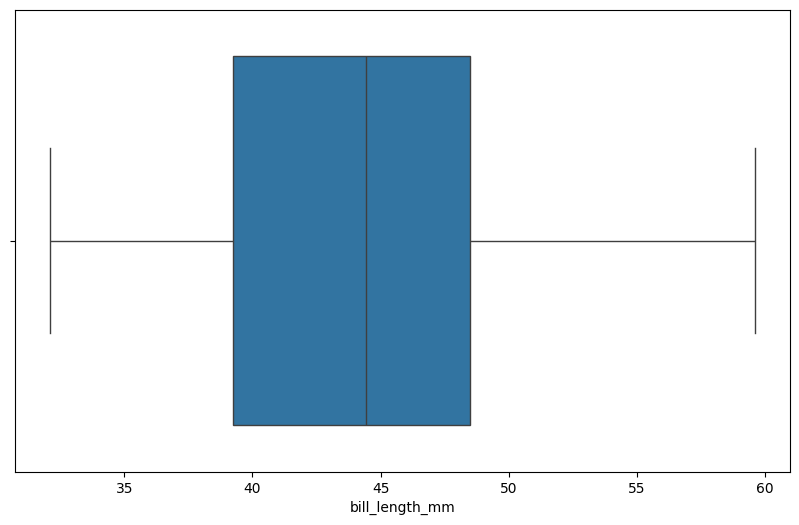

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["bill_length_mm"])
plt.show()